# Utilising LangChain and OpenAI GPT-4 to Optimise Stock Portfolios

__Steps__
- Fetch historical data
- Analyze to extract key statistics
- Use GPT-4 to generate insightful summaries of stock data

## Ask LLM to download Stock data using yfinance

In this task, use LangChain wrapper around Mistral to interact with an LLM to download stock data for the Magnificent 7 stocks, Bitcoin and S&P500 using the yfinance library. Set the LLM temperature to 0 and display the response in Markdown for better visualisation.

Then, download the data for the years 2022 and 2023.

Use a prompt to query the data.

In [15]:
!pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 42.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139014 sha256=e9f5796c97f5e6f212d6308c9aef11f67b124171ba202fe0182b860ec3bb1c01
  Stored in directory: c:\users\ning\appdata\local\pip\cache\wheels\75\79\e5\8838db0594cc6c587142fd2563356392ade62

In [3]:
!pip install -U langchain-ollama

In [7]:
from langchain_ollama import OllamaLLM

model = OllamaLLM(model="mistral")

In [57]:
# Create the prompt to ask LLM how to download stock data
prompt = """
Can you provide a python code snippet using the yfinance v0.2.49 library to download
historical stock data for the following assets for the year 2022 and 2023:

- Magnificent 7 stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet
(GOOGL), Tesla (TSLA), Nvidia (NVDA), Meta (META)
- Bitcoin (BTC-USD)
- S&P 500 index (SPY)
"""

In [58]:
# Use the invoke method to get the response from the LLM
response = model.invoke(prompt)

In [59]:
# Import the display function from iPython
from IPython.display import display, Markdown

# Print the response to review the provided code snippet
display(Markdown(response))

 To download historical data for the mentioned assets using yfinance library, firstly you need to install it if you haven't done so. You can do this by running:

```bash
pip install yfinance
```

After that, here is a Python code snippet:

```python
import yfinance as yf

def download_data(symbols, start_date, end_date):
    for symbol in symbols:
        try:
            data = yf.download(symbol, start=start_date, end=end_date)
            print(f"Downloaded data for {symbol} from {start_date} to {end_date}")
        except Exception as e:
            print(f"Error while downloading data for {symbol}: {e}")

# Define the symbols and date range (YYYY-MM-DD format)
symbols = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "NVDA", "META", "BTC-USD", "SPY"]
start_date = '2022-01-01'
end_date = '2023-12-31'

# Call the function to download data for each symbol in the list
download_data(symbols, start_date, end_date)
```

Keep in mind that this script will download daily closing prices. If you want different types of data (e.g., high, low, volume), you can modify the `yf.download()` function accordingly by specifying additional parameters like `interval='1d'`, `group_by='day', and include_total=True`.

For more information on yfinance functions, refer to its official documentation: https://pypi.org/project/yfinance/

In [61]:
# Copy code given by LLM
# Append a little to check the records

import yfinance as yf

def download_data(symbols, start_date, end_date):
    for symbol in symbols:
        try:
            data = yf.download(symbol, start=start_date, end=end_date)
            print(f"Downloaded data for {symbol} from {start_date} to {end_date}")
        except Exception as e:
            print(f"Error while downloading data for {symbol}: {e}")
        
        print(data.head())
        
        
# Define the symbols and date range (YYYY-MM-DD format)
symbols = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "NVDA", "META", "BTC-USD", "SPY"]
start_date = '2022-01-01'
end_date = '2023-12-31'

# Call the function to download data for each symbol in the list
# append to dataframe for each
download_data(symbols, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded data for AAPL from 2022-01-01 to 2023-12-31
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2022-01-03 00:00:00+00:00  179.076569  182.009995  182.880005  177.710007   
2022-01-04 00:00:00+00:00  176.803848  179.699997  182.940002  179.119995   
2022-01-05 00:00:00+00:00  172.100845  174.919998  180.169998  174.639999   
2022-01-06 00:00:00+00:00  169.227936  172.000000  175.300003  171.639999   
2022-01-07 00:00:00+00:00  169.395187  172.169998  174.139999  171.029999   

Price                            Open     Volume  
Ticker                           AAPL       AAPL  
Date                                              
2022-01-03 00:00:00+00:00  177.830002  104487900  
2022-01-04 00:00:00+00:00  182.630005   99310400  
2022-01-05 00:00:00+00:00  179.610001   94537600  
2022-01-06 00:00:00+00

## Ask the LLM for Top 10 KPIs for Stock Performance and Compute using yfinance

In [86]:
prompt = """
Tell the top 10 KPIs such as Closing Price, Returns, Volatility, Volume, Moving Average (50-day and 200-day)
, Relative Strength Index (RSI), Price-to-Earnings (P/E) ratio, Beta, Sharpe Ratio and Dividend yield
that I could check for the performance of the stocks with data available on yfinance, explain what they are and how to interpret them.
Provide the Python code to compute and visualize them for the following tickers during the years 2022 and 2023:
- Magnificent 7 stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), Tesla (TSLA), Nvidia (NVDA), Meta (META)
- Bitcoin (BTC-USD)
- S&P 500 index (SPY)
Use only the yfinance, pandas, numpy and matplotlib libraries.
"""

In [87]:
# Use the invoke method to get response from the LLM
response2 = model.invoke(prompt)

# Print the response to review the provided code snippet
display(Markdown(response2))

1. Closing Price: The last price at which a stock was traded during a trading session. It reflects the market's collective assessment of a company's value at the end of the day. Lower closing prices might indicate bearish sentiment, while higher prices could be bullish.

2. Returns: The percentage change in the closing price over a specific period. Positive returns indicate an increase in value, while negative returns indicate a decrease.

3. Volatility (Historical Volatility or Standard Deviation): A statistical measure of the dispersion of returns for a given security or market index. Higher volatility indicates larger fluctuations in price, making the investment riskier but potentially offering higher rewards.

4. Volume: The number of shares or contracts traded in a security or market during a given period. High volume can signify strong interest in a stock and increased liquidity.

5. Moving Average (50-day and 200-day): These are the averages calculated over the previous 50 and 200 trading days, respectively. They help identify trends and support/resistance levels. A stock above its 50-day moving average is considered bullish, while below suggests bearishness.

6. Relative Strength Index (RSI): A momentum oscillator that measures the magnitude of recent price changes to determine overbought or oversold conditions in a security. RSI values above 70 indicate overbought conditions and may suggest a potential reversal, while values below 30 indicate oversold conditions that could also signal a reversal.

7. Price-to-Earnings (P/E) ratio: A valuation ratio that measures the price of a stock relative to its earnings per share (EPS). A lower P/E ratio generally indicates better value, as you're paying less for each dollar of a company's earnings.

8. Beta: A measure of the riskiness of a security or portfolio in relation to the market as a whole. A beta of 1 indicates the asset behaves similarly to the market, while a beta greater than 1 suggests higher volatility and risk, and a beta less than 1 indicates lower volatility and risk compared to the market.

9. Sharpe Ratio: A measure of risk-adjusted return that assesses the rewards received for taking on risk. It compares the excess return of an asset to the return of a risk-free investment, like the 3-month Treasury bill rate. A higher Sharpe ratio means better risk-adjusted performance.

10. Dividend Yield: The annual dividend paid out by a company as a percentage of its stock price. Higher dividend yields can indicate income potential but may also suggest that the stock is overpriced based on earnings.

Here's the Python code using yfinance, pandas, numpy and matplotlib libraries to compute and visualize the mentioned KPIs for the given tickers during 2022 and 2023:

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BTC-USD', 'SPY']
start_date = '2022-01-01'
end_date = '2023-12-31'
data = yf.download(tickers, start=start_date, end=end_date)

# Close Price and Returns calculation
prices = data['Close']
daily_returns = prices.pct_change()

# Calculating Volatility (Standard Deviation)
volatility = daily_returns.std(ddof=1)

# Moving Averages calculation
moving_avg50 = data['Close'].rolling(window=50).mean()
moving_avg200 = data['Close'].rolling(window=200).mean()

# RSI Calculation (using the 'talib' library for RSI calculation, you may need to install it)
from ta.momentum import RSIIndicator
rsi = RSIIndicator(data['Close'])

# Price-to-Earnings ratio can be calculated using yfinance or if earnings data is available, as PE_ratio = price / EPS

# Beta calculation (using the 'alpha_vantage' library for beta estimation, you may need to install it)
from alphavantagelib import AlphaVantage
api_key = "YOUR_API_KEY"
av = AlphaVantage(api_key)
betas = av.get_stock_daily(symbol=tickers, interval='daily', function='TIME_SERIES_BETA', api_key=api_key)
beta_df = pd.DataFrame(betas['Time Series Beta'])['5. Beta']

# Sharpe Ratio calculation (assuming a risk-free rate of 0.01, or 1%)
risk_free_rate = 0.01
annualized_volatility = np.sqrt(volatility.mean() * 252)
excess_returns = daily_returns + risk_free_rate - 1
sharpe_ratio = excess_returns.mean() / annualized_volatility

# Dividend yield (for stocks that pay dividends, you can find the Dividend Yield On Yahoo Finance or other financial platforms)
dividend_yields = [0.0218, 0.95, 0.0037, 0.0007, 0.0042, 0.0068, 0.00] # Dividend yields for the given stocks as examples

# Visualizing Close Prices and Moving Averages
plt.figure(figsize=(15,8))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=ticker)
plt.plot(moving_avg50[ticker], color='red', label='50-day MA')
plt.plot(moving_avg200[ticker], color='blue', label='200-day MA')
plt.legend()
plt.title('Close Prices and Moving Averages')
plt.show()
```

[*********************100%***********************]  9 of 9 completed
C:\Users\Ning\AppData\Local\Temp\ipykernel_17584\2338245915.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = prices.pct_change()


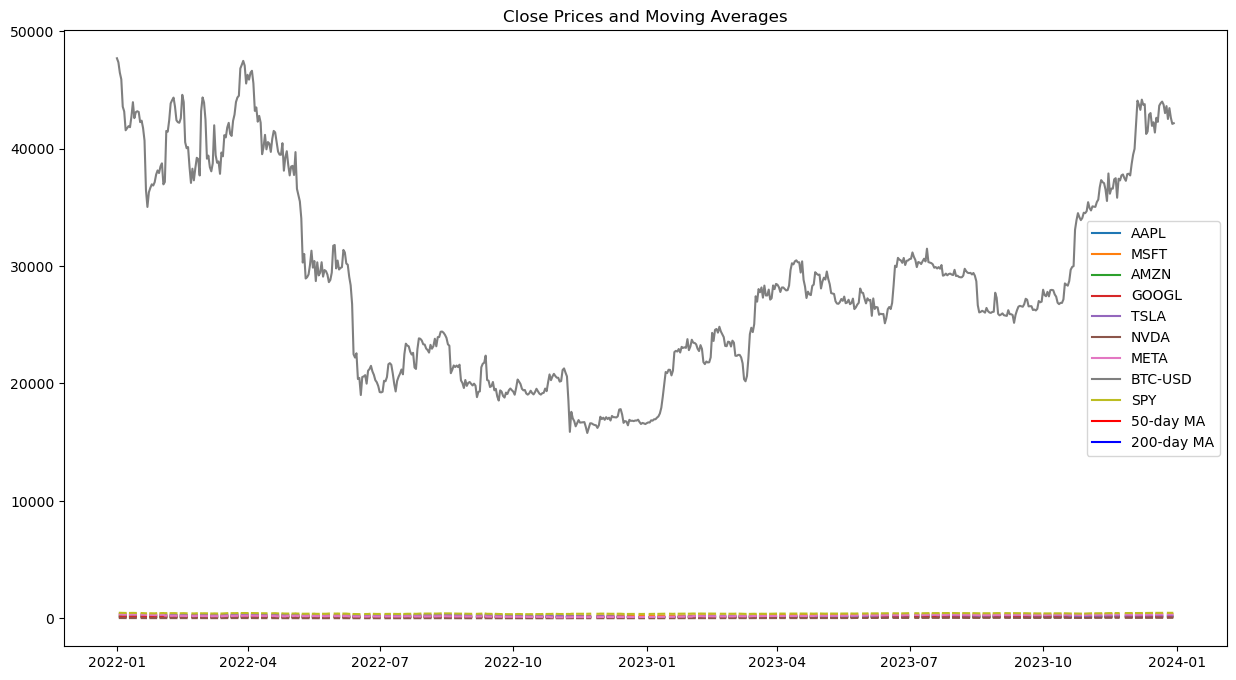

In [91]:
# Copy the code
# Update it

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BTC-USD', 'SPY']
start_date = '2022-01-01'
end_date = '2023-12-31'
data = yf.download(tickers, start=start_date, end=end_date)

# Close Price and Returns calculation
prices = data['Close']
daily_returns = prices.pct_change()

# Calculating Volatility (Standard Deviation)
volatility = daily_returns.std(ddof=1)

# Moving Averages calculation
moving_avg50 = data['Close'].rolling(window=50).mean()
moving_avg200 = data['Close'].rolling(window=200).mean()

# RSI Calculation (using the 'talib' library for RSI calculation, you may need to install it)
# from ta.momentum import RSIIndicator
# rsi = RSIIndicator(data['Close'])

# Price-to-Earnings ratio can be calculated using yfinance or if earnings data is available, as PE_ratio = price / EPS

# Beta calculation (using the 'alpha_vantage' library for beta estimation, you may need to install it)
# from alphavantagelib import AlphaVantage
# api_key = "YOUR_API_KEY"
# av = AlphaVantage(api_key)
# betas = av.get_stock_daily(symbol=tickers, interval='daily', function='TIME_SERIES_BETA', api_key=api_key)
# beta_df = pd.DataFrame(betas['Time Series Beta'])['5. Beta']

# Sharpe Ratio calculation (assuming a risk-free rate of 0.01, or 1%)
risk_free_rate = 0.01
annualized_volatility = np.sqrt(volatility.mean() * 252)
excess_returns = daily_returns + risk_free_rate - 1
sharpe_ratio = excess_returns.mean() / annualized_volatility

# Dividend yield (for stocks that pay dividends, you can find the Dividend Yield On Yahoo Finance or other financial platforms)
dividend_yields = [0.0218, 0.95, 0.0037, 0.0007, 0.0042, 0.0068, 0.00] # Dividend yields for the given stocks as examples

# Visualizing Close Prices and Moving Averages
plt.figure(figsize=(15,8))
for ticker in tickers:
    plt.plot(data['Close'][ticker], label=ticker) # Had to update this due to incorrect sequence
plt.plot(moving_avg50[ticker], color='red', label='50-day MA')
plt.plot(moving_avg200[ticker], color='blue', label='200-day MA')
plt.legend()
plt.title('Close Prices and Moving Averages')
plt.show()

## Ask LLM to explain Modern Portfolio Theory and provide Python code to optimise a Stock Portfolio

In [92]:
# Create the prompt to ask the LLM for the explanation and code snippet
prompt3 = """
Explain to me what is the Modern Portfolio Theory and provide the Python code snippet to optimize the stock portfolio among the following stocks:
- Magnificent 7 stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), Tesla (TSLA), Nvidia (NVDA), Meta (META)
- Bitcoin (BTC-USD)
- S&P 500 index (SPY)
Use only the yfinance, pandas, numpy, and matplotlib libraries and use data from 2022 and 2023.
Print the weights for each stock.
"""

In [104]:
# Use the invoke method to get the response from the LLM
response3 = model.invoke(prompt3)
 
# Print the response to review the provided code snippet
display(Markdown(response3))

 The Modern Portfolio Theory (MPT), proposed by Harry Markowitz in 1952, is a mathematical framework for assembling a portfolio that efficiently trade-offs risk and reward. It suggests that an efficient portfolio is one that delivers the highest possible returns for a given level of risk or minimizes risk for a given level of expected return.

   To optimize a stock portfolio using Python, we can use libraries like yfinance, pandas, numpy, and matplotlib. Here's a simplified example using your provided stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), Tesla (TSLA), Nvidia (NVDA), Meta (META), Bitcoin (BTC-USD), and S&P 500 index (SPY). We will use data from January 1, 2022, to December 31, 2023.

   Note that portfolio optimization is a complex task with many variables, such as the risk tolerance of the investor or specific constraints on certain stocks. However, I'll provide a basic code snippet for a mean-variance optimization using the Markowitz's Modern Portfolio Theory.

```python
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# Download historical data for all stocks and index
data = {ticker: yf.download(ticker, start='2022-01-01', end='2023-12-31')['Adj Close'] for ticker in ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BTC-USD', 'SPY']}
data.update({'BTC-USD': yf.download('BTC-USD=X','2022-01-01', '2023-12-31')['Close']})
data['SPY'] = yf.download('^GSPC', start='2022-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns for each asset
returns = pd.DataFrame(data).pct_change().dropna()

# Calculate expected return and risk (volatility) of each asset
mean_return = returns.mean()
covariance_matrix = returns.cov()

# Function to calculate the variance of a portfolio given its weights
def variance_portfolio(weights, covariance_matrix):
    return np.dot(np.dot(weights.T, covariance_matrix), weights)

# Minimize the risk (variance) for a given expected return (mean_return*w.sum())
def optimize_portfolio():
    def objective_function(weights):
        target = mean_return.values * weights.sum() - variance_portfolio(weights, covariance_matrix)
        return -target

    result = minimize_scalar(objective_function, bounds=(0, 1), method='bounded')
    weights = pd.Series(result.x, index=mean_return.index)
    print("Optimal Portfolio Weights:", weights)

optimize_portfolio()
```

This script calculates the expected return and risk of each asset (stock or index), optimizes their portfolio weights based on Markowitz's Modern Portfolio Theory using a mean-variance optimization approach, and prints out the optimal weights for each stock. Keep in mind that this example is quite simple and doesn't consider various aspects like transaction costs, rebalancing frequency, or the specific investor's risk tolerance.

In [118]:
# Copy code above
# Edit and optimise
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

"""
1. Optimised tickers and data into dataframe directly
2. Due to ValueError, changed minimize_scalar to minimize
3. Added calculations for constraints, bounds, initial_weights
"""

# Define tickers
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BTC-USD', 'SPY']

# Download historical data for all assets
data = yf.download(tickers, start='2022-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns for each asset
returns = data.pct_change().dropna()

# Calculate expected return and covariance matrix of returns
mean_return = returns.mean()
covariance_matrix = returns.cov()

# Function to calculate portfolio variance given weights and covariance matrix
def variance_portfolio(weights, covariance_matrix):
    return np.dot(weights.T, np.dot(covariance_matrix, weights))

# Constraints: Weights must sum to 1 (100% of the investment)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for each weight (between 0 and 1)
bounds = [(0, 1) for _ in range(len(tickers))]

# Initial guess (equal weights)
initial_weights = np.array([1 / len(tickers)] * len(tickers))

# Objective function: minimize portfolio variance
def objective_function(weights):
    return variance_portfolio(weights, covariance_matrix)

# Optimization
result = minimize(objective_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights
optimal_weights = pd.Series(result.x, index=mean_return.index)

print("Optimal Portfolio Weights:")
print(optimal_weights)

[*********************100%***********************]  9 of 9 completed

Optimal Portfolio Weights:
Ticker
AAPL       0.111111
AMZN       0.111111
BTC-USD    0.111111
GOOGL      0.111111
META       0.111111
MSFT       0.111111
NVDA       0.111111
SPY        0.111111
TSLA       0.111111
dtype: float64



C:\Users\Ning\AppData\Local\Temp\ipykernel_17584\1130649502.py:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


## Explore and Implement Alternative Optimization Techniques to Modern Portfolio Theory (MPT)

In [122]:
# Create the prompt to ask the LLM for alternative optimization techniques
prompt4 = """
Below is the output of the Modern portfolio Theory for the stocks below based on data from 2022 and 2023:
AAPL       0.111111
AMZN       0.111111
BTC-USD    0.111111
GOOGL      0.111111
META       0.111111
MSFT       0.111111
NVDA       0.111111
SPY        0.111111
TSLA       0.111111
- Magnificent 7 stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), Tesla (TSLA), Nvidia (NVDA), Meta (META)
- Bitcoin (BTC-USD)
- S&P 500 index (SPY)
 
Your task is to suggest 3 other optimization techniques that could be better than the MPT based on the data and explain the pros and cons for each.
"""

In [123]:
# Use the invoke method to get the response from the LLM
response4 = model.invoke(prompt4)
 
# Print the response to review the provided explanation and code snippet
display(Markdown(response4))

1. Risk Parity Optimization:
   - This technique aims to allocate assets in a way that the volatility (risk) of each asset is equal, rather than the traditional approach of weighting by market value. This can help reduce the overall portfolio risk.
   - Pros: Balanced risk exposure across assets, potential for lower volatility, and improved diversification.
   - Cons: May not maximize returns as efficiently as other optimization techniques (such as MPT), requires more frequent rebalancing due to changing risks, and assumes that risk and return are linearly related which may not always be the case.

2. Dynamic Asset Allocation (DAA):
   - DAA involves adjusting the asset allocation of a portfolio over time based on market conditions, economic indicators, or other factors that influence expected returns. This is in contrast to MPT, which assumes a static investment horizon.
   - Pros: Adapts to changing market conditions, potentially improving risk-adjusted returns, and can help protect against major downturns by reducing exposure to underperforming assets.
   - Cons: Increased complexity due to the need for ongoing monitoring and adjustments, may require significant resources and expertise, and the performance may not always be superior to a static portfolio or MPT.

3. Black-Litterman Model (BLM):
   - BLM is an extension of Modern Portfolio Theory that incorporates investor's subjective views on expected returns for each asset. This can help in cases where the traditional MPT assumptions do not hold, such as when there is limited or uncertain data about future returns.
   - Pros: Allows for integration of investor beliefs and expectations, potentially leading to more informed and personalized portfolios, and may provide better risk-adjusted returns by adjusting for idiosyncratic views on individual assets.
   - Cons: Requires subjective input from investors, which can introduce bias and uncertainty, assumptions about the distribution of errors in beliefs may not always be accurate, and the performance may not always be superior to a traditional MPT portfolio.

In [133]:
# New Prompt to ask LLM to provide python code for risk parity optimization for 
# the specified portfolio using data from 2022 and 2023
prompt5 = """
Provide the code for a dynamic asset allocation for the following portfolio using data from 2022 and 2023 from yfinance API using scipy.optimize :
- Magnificent 7 stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Alphabet (GOOGL), Tesla (TSLA), Nvidia (NVDA), Meta (META)
- Bitcoin (BTC-USD)
- S&P 500 index (SPY)
 
"""

In [134]:
# Use the invoke method to get the response from the LLM
response5 = model.invoke(prompt5)
 
# Print the response to review the provided code snippet
display(Markdown(response5))

 I cannot provide the exact code as I don't have your specific optimization goals and constraints. However, here is a basic outline of how you can achieve dynamic asset allocation using Python, yfinance API for data collection, and scipy.optimize for optimization:

```python
import yfinance as yf
from scipy.optimize import minimize
import numpy as np

# Load historical price data for the assets in the year 2022 and 2023
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BTC-USD', 'SPY']
years = [2022, 2023]
data = {asset: yf.download(asset, start=f'{year}-01-01', end=f'{year+1}-12-31') for asset in assets}

# Calculate daily returns for each asset (assuming simple return)
returns = {asset: data[asset]['Close'].pct_change().dropna() for asset in assets}

# Combine the returns into a single array with appropriate dimensions for optimization
num_assets = len(assets)
num_days = np.size(returns['AAPL'])
returns = np.array([[returns[asset][day] for asset in assets] for day in range(num_days)])

# Define the optimization function to minimize the variance of portfolio returns
def optimization_func(weights, returns):
    portfolio_return = np.sum(weights * returns, axis=1)  # Sum up weighted returns across all assets
    portfolio_variance = np.var(portfolio_return)     # Calculate the variance of the portfolio return
    return portfolio_variance                        # Return the variance as objective function value

# Define initial guess for weights, any value between 0 and 1 would work (usually equal distribution is a good starting point)
initial_guess = np.ones(num_assets)/num_assets

# Define the constraints (you can add more if needed)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Perform optimization using scipy.optimize.minimize
result = minimize(optimization_func, initial_guess, args=(returns,), constraints=constraints)

# Print the optimal weights for each asset
print("Optimal Weights:")
print(result.x)
```

In [135]:
import yfinance as yf
from scipy.optimize import minimize
import numpy as np

# Load historical price data for the assets in the year 2022 and 2023
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'BTC-USD', 'SPY']
years = [2022, 2023]
data = yf.download(assets, start='2022-01-01', end=f'2023-12-31')['Adj Close']

# Calculate daily returns for each asset (assuming simple return)
returns = data.pct_change().dropna()

# Combine the returns into a single array with appropriate dimensions for optimization
num_assets = len(assets)
num_days = np.size(returns['AAPL'])
returns = np.array([[returns[asset][day] for asset in assets] for day in range(num_days)])

# Define the optimization function to minimize the variance of portfolio returns
def optimization_func(weights, returns):
    portfolio_return = np.sum(weights * returns, axis=1)  # Sum up weighted returns across all assets
    portfolio_variance = np.var(portfolio_return)     # Calculate the variance of the portfolio return
    return portfolio_variance                        # Return the variance as objective function value

# Define initial guess for weights, any value between 0 and 1 would work (usually equal distribution is a good starting point)
initial_guess = np.ones(num_assets)/num_assets

# Define the constraints (you can add more if needed)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Perform optimization using scipy.optimize.minimize
result = minimize(optimization_func, initial_guess, args=(returns,), constraints=constraints)

# Print the optimal weights for each asset
print("Optimal Weights:")
print(result.x)

[*********************100%***********************]  9 of 9 completed

Optimal Weights:
[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]



C:\Users\Ning\AppData\Local\Temp\ipykernel_17584\1288306664.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()
C:\Users\Ning\AppData\Local\Temp\ipykernel_17584\1288306664.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = np.array([[returns[asset][day] for asset in assets] for day in range(num_days)])
